In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

plt.rcParams["font.family"] = "sans-serif"

In [4]:
cd = "C://Users//scottjmk//Dropbox//Research//petra_moser//"

df1 = pd.read_csv(cd+"Replication//Data//MoS1956/MoS1956_Final.csv")
df1 = df1[["unique_id", "birthyear", "gender_clean", "child", "vol_num", "see"]]

df2 = df1[df1["see"].isnull()][~df1["birthyear"].isnull()][df1["gender_clean"] != "unknown"]

male = df2[df2["gender_clean"] == "male"]
female = df2[df2["gender_clean"] == "female"]
fathers = df2[df2["gender_clean"] == "male"][~df2["child"].isnull()]
other_men = df2[df2["gender_clean"] == "male"][df2["child"].isnull()]
mothers = df2[df2["gender_clean"] == "female"][~df2["child"].isnull()]
other_women = df2[df2["gender_clean"] == "female"][df2["child"].isnull()]

male_scientist = male.groupby("birthyear").size().reset_index().rename(columns = {0: "male_count"}).sort_values(by = "birthyear")
female_scientist = female.groupby("birthyear").size().reset_index().rename(columns = {0: "female_count"}).sort_values(by = "birthyear")
fathers_scientist = fathers.groupby("birthyear").size().reset_index().rename(columns = {0: "fathers_count"}).sort_values(by = "birthyear")
other_men_scientist = other_men.groupby("birthyear").size().reset_index().rename(columns = {0: "other_men_count"}).sort_values(by = "birthyear")
mothers_scientist = mothers.groupby("birthyear").size().reset_index().rename(columns = {0: "mothers_count"}).sort_values(by = "birthyear")
other_women_scientist = other_women.groupby("birthyear").size().reset_index().rename(columns = {0: "other_women_count"}).sort_values(by = "birthyear")

df = male_scientist.copy()

for x in [female_scientist, fathers_scientist, other_men_scientist, mothers_scientist, other_women_scientist]:
    df = pd.merge(df, x, on = "birthyear", how = "outer")
df.replace(np.nan, 0, inplace = True)
    
df

<ipython-input-4-b14d65d4058d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[df1["see"].isnull()][~df1["birthyear"].isnull()][df1["gender_clean"] != "unknown"]
<ipython-input-4-b14d65d4058d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fathers = df2[df2["gender_clean"] == "male"][~df2["child"].isnull()]
<ipython-input-4-b14d65d4058d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  other_men = df2[df2["gender_clean"] == "male"][df2["child"].isnull()]
<ipython-input-4-b14d65d4058d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mothers = df2[df2["gender_clean"] == "female"][~df2["child"].isnull()]
<ipython-input-4-b14d65d4058d>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  other_women = df2[df2["gender_clean"] == "female"][df2["child"].isnull()]


,birthyear,male_count,female_count,fathers_count,other_men_count,mothers_count,other_women_count
0,1853.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1856.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1857.0,2.0,0.0,0.0,2.0,0.0,0.0
3,1858.0,2.0,0.0,1.0,1.0,0.0,0.0
4,1859.0,7.0,0.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
75,1930.0,69.0,4.0,18.0,51.0,0.0,4.0
76,1931.0,17.0,0.0,4.0,13.0,0.0,0.0
77,1932.0,4.0,1.0,1.0,3.0,0.0,1.0
78,1933.0,1.0,0.0,0.0,1.0,0.0,0.0


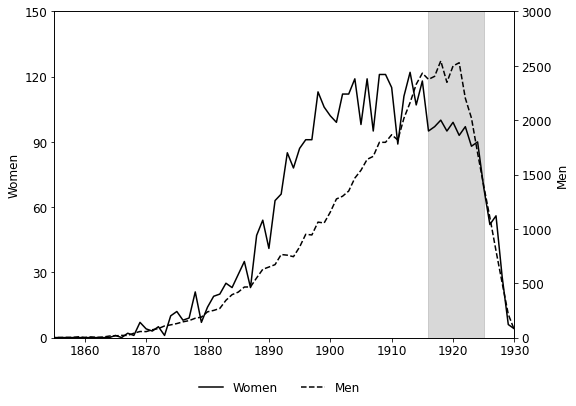

In [22]:
fig, ax1 = plt.subplots(figsize = (8.25, 6))
ax2 = ax1.twinx()

df.set_index("birthyear")["female_count"].plot(ax = ax1, color = "black", linewidth = 1.5, label = "Women")
df.set_index("birthyear")["male_count"].plot(ax = ax2, color = "black", linewidth = 1.5, linestyle = "--", label = "Men")
ax1.set_ylabel("Women", fontsize = 12)
ax2.set_ylabel("Men", fontsize = 12)
ax1.set_xlim(1855, 1930)
ax1.set_ylim(0, 150)
ax2.set_ylim(0, 3000)
ax1.set_yticks([0, 30, 60, 90, 120, 150])
ax1.set_xlabel("", fontsize = 12)
ax1.legend(loc = "upper center", bbox_to_anchor = (0.40, -0.1), frameon = False, fontsize = 12)
ax2.legend(loc = "upper center", bbox_to_anchor = (0.60, -0.1), frameon = False, fontsize = 12)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

ax1.axvspan(1916, 1925, color = "gray", alpha = 0.3)

plt.savefig(cd+"Replication//Output//Figures/Figure9.jpg", transparent=False, bbox_inches="tight")

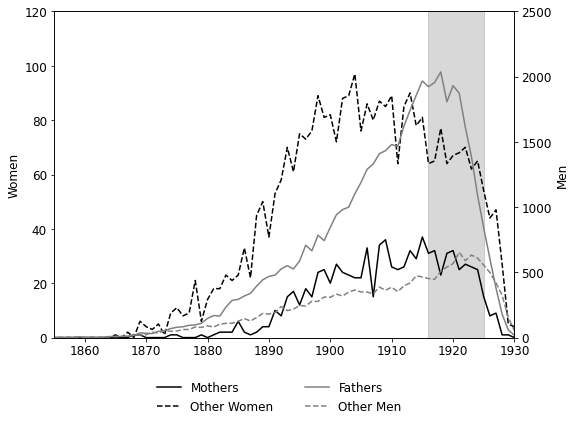

In [23]:
fig, ax1 = plt.subplots(figsize = (8.25, 6))
ax2 = ax1.twinx()

df.set_index("birthyear")["mothers_count"].plot(ax = ax1, color = "black", linewidth = 1.5, label = "Mothers")
df.set_index("birthyear")["other_women_count"].plot(ax = ax1, color = "black", linewidth = 1.5, linestyle = "--", label = "Other Women")
df.set_index("birthyear")["fathers_count"].plot(ax = ax2, color = "gray", linewidth = 1.5, label = "Fathers")
df.set_index("birthyear")["other_men_count"].plot(ax = ax2, color = "gray", linewidth = 1.5, linestyle = "--", label = "Other Men")
ax1.set_ylabel("Women", fontsize = 12)
ax2.set_ylabel("Men", fontsize = 12)
ax1.set_xlim(1855, 1930)
ax1.set_ylim(0, 120)
ax2.set_ylim(0, 2500)
ax1.set_xlabel("", fontsize = 12)
ax1.legend(loc = "upper center", bbox_to_anchor = (0.35, -0.1), frameon = False, fontsize = 12)
ax2.legend(loc = "upper center", bbox_to_anchor = (0.65, -0.1), frameon = False, fontsize = 12)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

ax1.axvspan(1916, 1925, color = "gray", alpha = 0.3)

plt.savefig(cd+"Replication//Output//Figures/Figure9B.jpg", transparent=False, bbox_inches="tight")